# Mapa de calor - Bird Bones

Hay muchos tipos de pájaros: palomas, patos, avestruces, pingüinos ... Algunos son buenos para volar, otros no pueden volar pero corren rápido.

Según sus entornos y hábitos de vida, las aves se clasifican en diferentes grupos ecológicos. Hay 8 grupos ecológicos de aves:

* Aves nadando: SW

* Aves zancudas: W

* Aves Terrestres: T

* Rapaces: R

* Aves Scansoriales: P

* Pájaros cantando : SO

Cursorial Birds (no incluido en el conjunto de datos)

Aves marinas (no incluidas en el conjunto de datos)


In [123]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [124]:
#https://www.kaggle.com/zhangjuefei/birds-bones-and-living-habits
# Los esqueletos de este conjunto de datos son colecciones del Museo de Historia Natural del Condado de Los Ángeles.
#Pertenecen a 21 órdenes, 153 géneros, 245 especies.
df=pd.read_csv('bird.csv')
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


Hay 420 pájaros contenidos en este conjunto de datos. Cada ave está representada por 10 medidas ( características ):

* Longitud y diámetro del húmero
* Longitud y diámetro del cúbito
* Longitud y diámetro del fémur
* Longitud y diámetro de Tibiotarsus
* Longitud y diámetro del tarsometatarso

![](https://s-media-cache-ak0.pinimg.com/564x/cb/cb/41/cbcb41cb2c1db6c32c1e869be2172c3b.jpg)

# Conociendo los datos

In [125]:
df.shape

(420, 11)

In [126]:
df.dtypes

huml     float64
humw     float64
ulnal    float64
ulnaw    float64
feml     float64
femw     float64
tibl     float64
tibw     float64
tarl     float64
tarw     float64
type      object
dtype: object

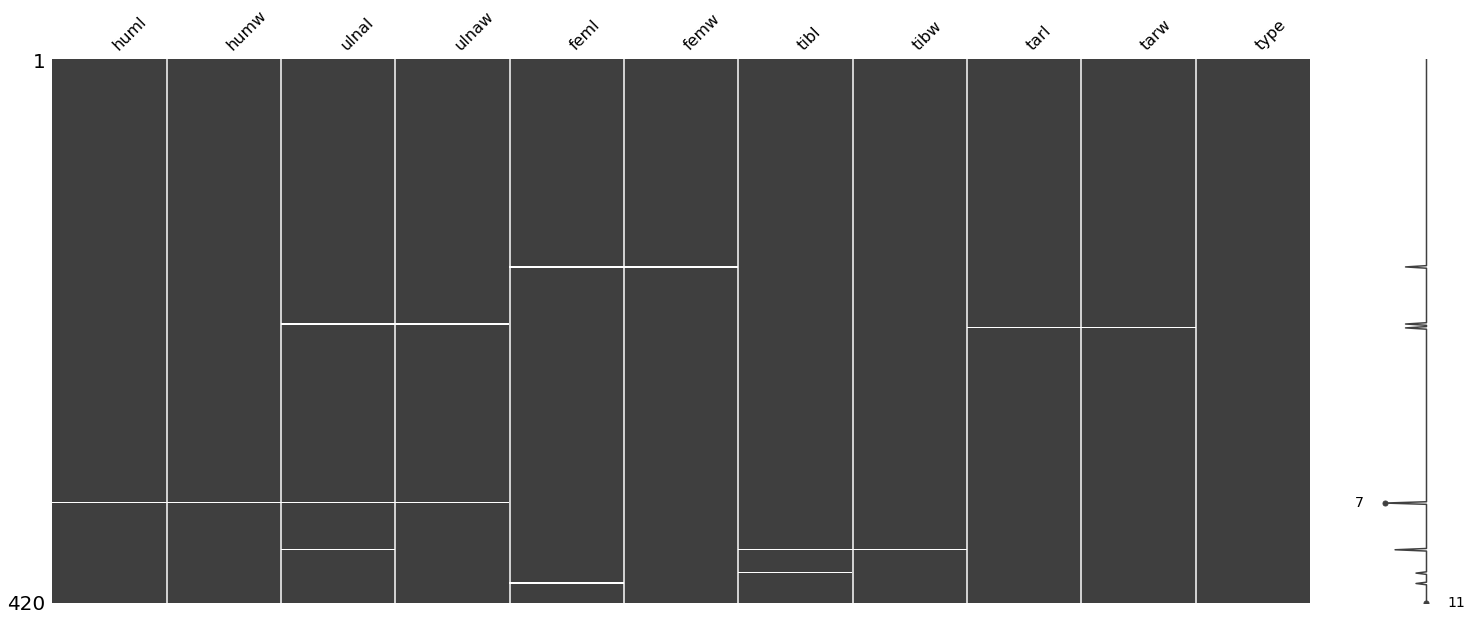

In [127]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

Debemos suplantar los nullos o quitarlos

In [128]:
#Si eleminamos los nulos solo quitamos 7 registros
dn=df.dropna()
dn.shape

(413, 11)

In [129]:
dn.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,64.874867,4.381235,69.197409,3.606538,36.822446,3.221768,64.615642,3.182324,39.309806,2.944891
std,54.056078,2.861460,58.929490,2.190150,19.899356,2.021169,37.977929,2.084124,23.272704,2.194744
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.360000,2.200000,28.160000,1.870000,21.350000,1.720000,36.350000,1.560000,23.050000,1.430000
50%,44.180000,3.500000,43.710000,2.960000,31.090000,2.520000,51.880000,2.490000,31.740000,2.240000
75%,90.490000,5.820000,97.520000,4.770000,47.090000,4.110000,82.870000,4.250000,50.440000,3.520000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [130]:
#Remplazando por el promedio 
dn2=df.fillna(df.mean())
dn2.shape

(420, 11)

In [131]:
dn2.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,53.770269,2.851208,58.573950,2.181522,19.931342,2.021165,37.747731,2.078343,23.156631,2.183063
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.205000,2.190000,28.132500,1.870000,21.332500,1.717500,36.472500,1.567500,23.042500,1.427500
50%,44.325000,3.510000,43.880000,2.965000,31.390000,2.525000,52.325000,2.495000,31.810000,2.235000
75%,90.220000,5.805000,97.205000,4.770000,47.100000,4.122500,82.870000,4.252500,50.155000,3.490000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [132]:
dn.isnull().any().any()

False

In [133]:
dn2.isnull().any().any()

False

# Distribución del target

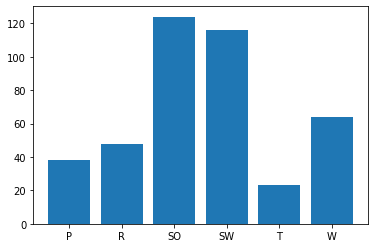

type
P      38.0
R      48.0
SO    124.0
SW    116.0
T      23.0
W      64.0
Name: (huml, count), dtype: float64

In [134]:
#Distribución del target en dn
group=dn.groupby('type')
g=group.describe()
y=g[('huml', 'count')].values.tolist()
x=g.index.values.tolist()
plt.bar(x, y)
plt.show()
g[('huml', 'count')]

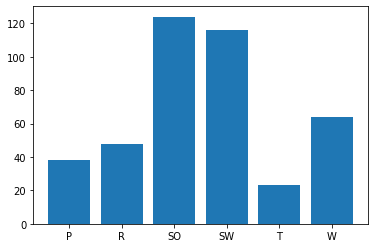

type
P      38.0
R      48.0
SO    124.0
SW    116.0
T      23.0
W      64.0
Name: (huml, count), dtype: float64

In [135]:
#Distribución del target en dn2
group=dn.groupby('type')
g=group.describe()
y=g[('huml', 'count')].values.tolist()
x=g.index.values.tolist()
plt.bar(x, y)
plt.show()
g[('huml', 'count')]

# Codigo para convertir a valores numerios más de la columna
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cols=df.columns.values.tolist()
while(len(cols)>5):
    cols.pop(5)
for i in cols:
    column=label_encoder.fit_transform(df[i].tolist())
    df=df.drop([i], axis=1)
    df[i]=column
df.head()


In [136]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
list1=dn.type.values.tolist()
list2=dn2.type.values.tolist()
dn=dn.drop(['type'], axis=1)
dn2=dn2.drop(['type'], axis=1)
dn['type']=label_encoder.fit_transform(list1)
dn2['type']=label_encoder.fit_transform(list2)

In [137]:
#El target, o la clasificación debe tener los mismo valores
print(dn.type.unique())
print(dn2.type.unique())

[3 5 4 1 0 2]
[3 5 4 1 0 2]


# Mapa de calor para el dataset1 (413 filas)

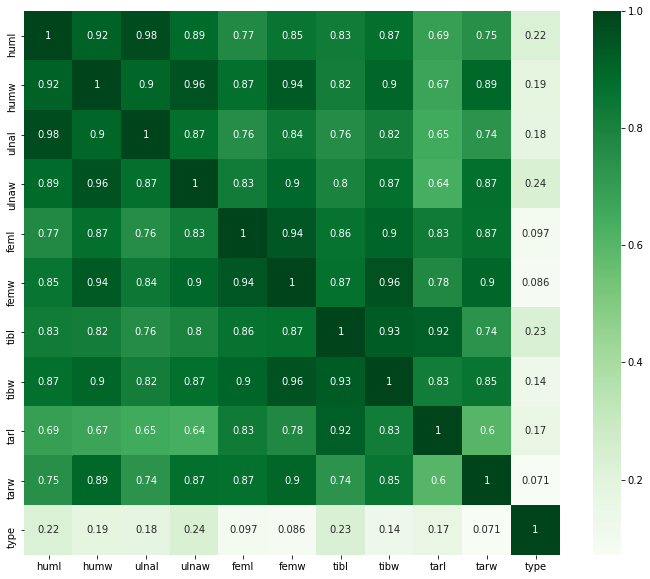

In [138]:
plt.figure(figsize=(12,10))
cor = dn.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

# Mapa de calor para el dataset2 (420 filas)

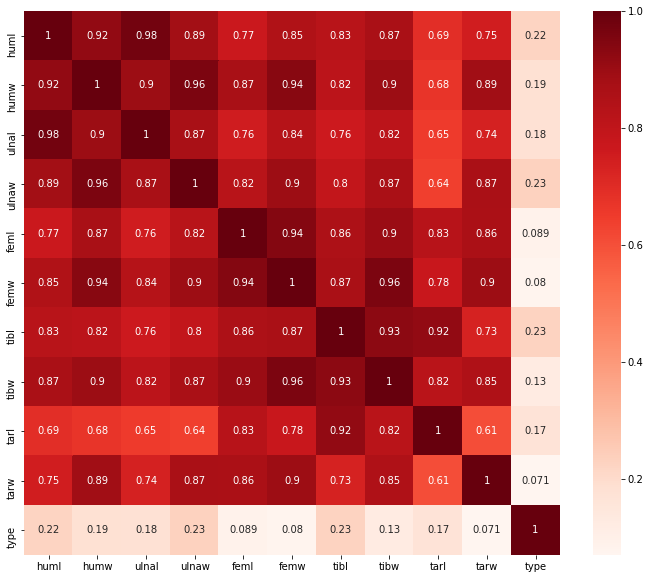

In [139]:
plt.figure(figsize=(12,10))
cor = dn2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Podemos ver que no hay relación entre las variables(X) con el objetivo(Y), por lo tanto diriamos que nuestro modelos nos arrojaría una mala clasificación, sin embargo el intento de este proyecto es generar un modelo que genere buenas respuestas siendo capaz de clasificar un nuevo resgistro.

In [140]:
# Guardamos los nuevos datasets
dn.to_csv('birds_without_nn.csv', index=False)

In [141]:
dn2.to_csv('birds_avarage.csv', index=False)